___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [91]:
#pip install folium 

In [92]:
df = pd.read_csv("./Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.610,1,1,1,101699.770,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.000,1,0,1,42085.580,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.310,2,1,0,92888.520,1


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [93]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [94]:
df.shape

(10000, 14)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [96]:
df.isnull().sum().any()

False

In [97]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [98]:
df.columns = map(str.lower, df.columns) # We change column headers all lowercase due to use of easily

### Row_number and CustomerId

In [99]:
# We drop rownumber and customerıd because of that don't impact your model and target and it is redundant for modeling

In [100]:
df = df.drop(['customerid',"rownumber"], axis = 1)

In [101]:
df.head()

,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


### Surname

In [102]:
# We drop surname feature because of that don't impact your model and target

In [103]:
df.surname.value_counts()

Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: surname, Length: 2932, dtype: int64

In [104]:
df.surname.nunique()

2932

In [105]:
df = df.drop("surname", axis = 1)

### Credit Score

In [106]:
df.creditscore.value_counts()

850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: creditscore, Length: 460, dtype: int64

<AxesSubplot:xlabel='creditscore', ylabel='Count'>

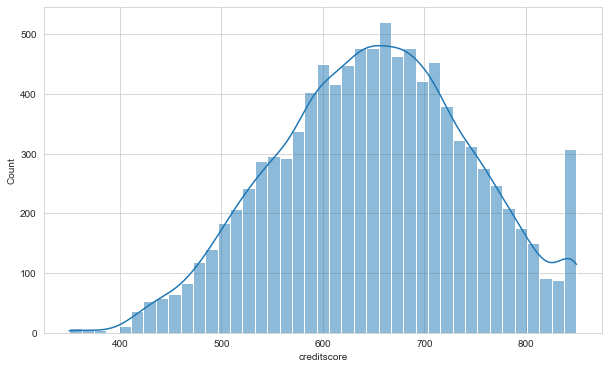

In [107]:
sns.histplot(df.creditscore, kde=True)

<AxesSubplot:xlabel='exited', ylabel='creditscore'>

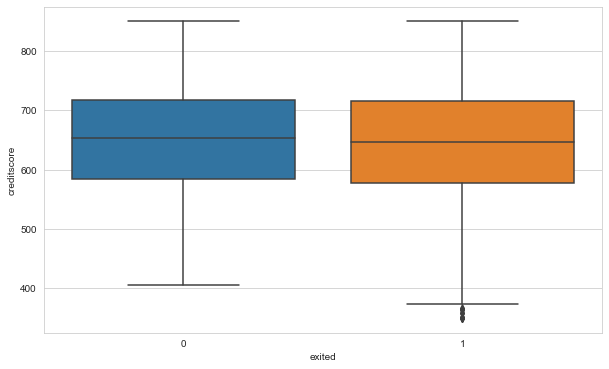

In [108]:
sns.boxplot(x = df.exited, y =df.creditscore)

### Geography

In [109]:
df.geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: geography, dtype: int64

<AxesSubplot:xlabel='geography', ylabel='count'>

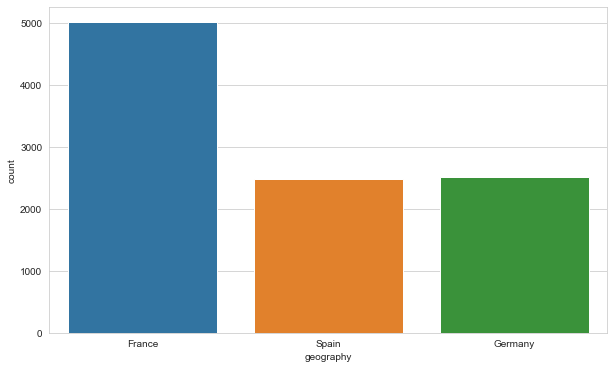

In [110]:
sns.countplot(df["geography"])

In [111]:
df.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


<AxesSubplot:xlabel='geography', ylabel='count'>

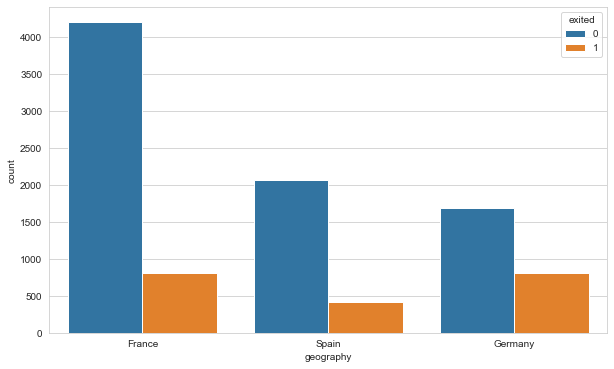

In [112]:
sns.countplot(df["geography"] ,hue=df.exited)

### Gender

In [113]:
df.gender.value_counts()

Male      5457
Female    4543
Name: gender, dtype: int64

In [114]:
# We replace object value with int in gender feature for model transaction (Convert categorical variables to dummy variables)

<AxesSubplot:xlabel='gender', ylabel='count'>

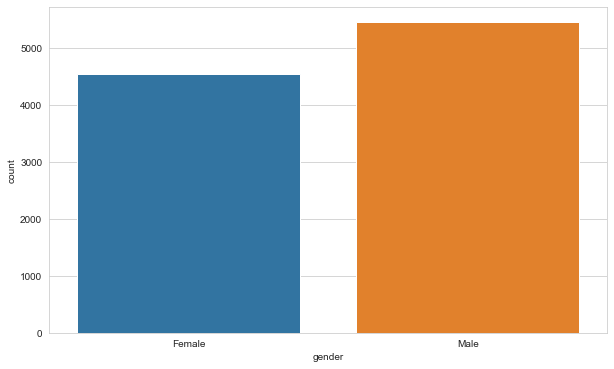

In [115]:
sns.countplot(df["gender"])

In [116]:
df['gender'] = df['gender'].replace(['Female', 'Male'], [0, 1])

<AxesSubplot:xlabel='gender', ylabel='count'>

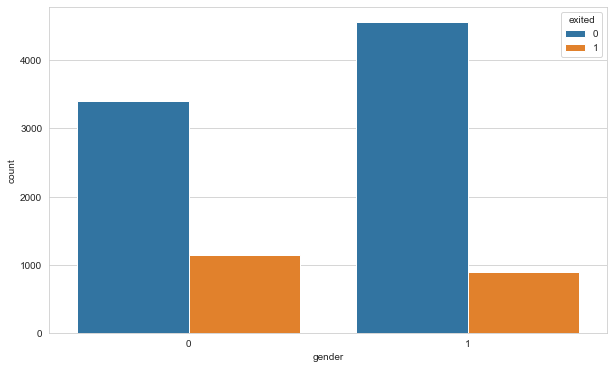

In [117]:
sns.countplot(df["gender"] ,hue=df.exited)

### Age

In [118]:
df.age.value_counts()

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: age, Length: 70, dtype: int64

<AxesSubplot:xlabel='age', ylabel='Count'>

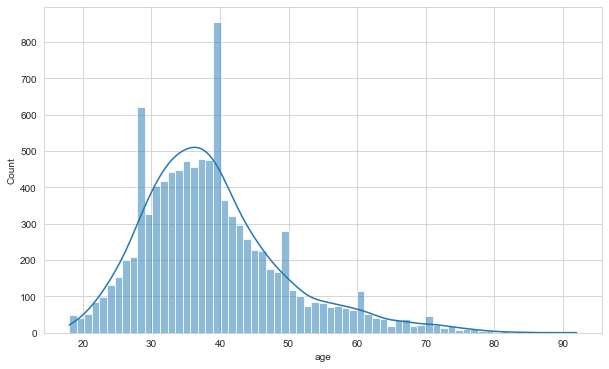

In [119]:
sns.histplot(df.age, kde = True )

<AxesSubplot:xlabel='exited', ylabel='age'>

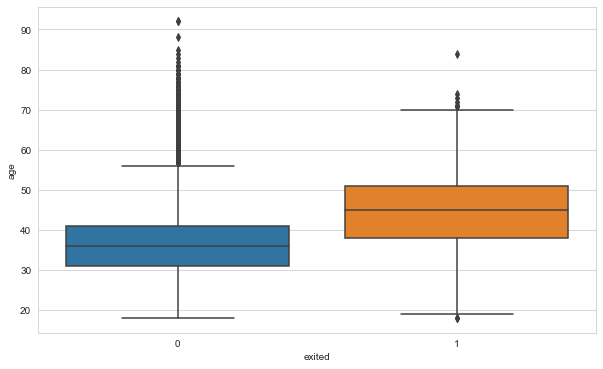

In [120]:
sns.boxplot(x = df.exited, y =df.age)

### Tenure

In [121]:
df.tenure.value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: tenure, dtype: int64

<AxesSubplot:xlabel='tenure', ylabel='count'>

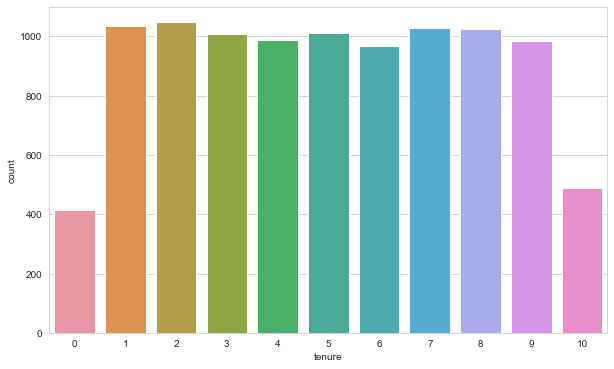

In [122]:
sns.countplot(df.tenure)

<AxesSubplot:xlabel='exited', ylabel='tenure'>

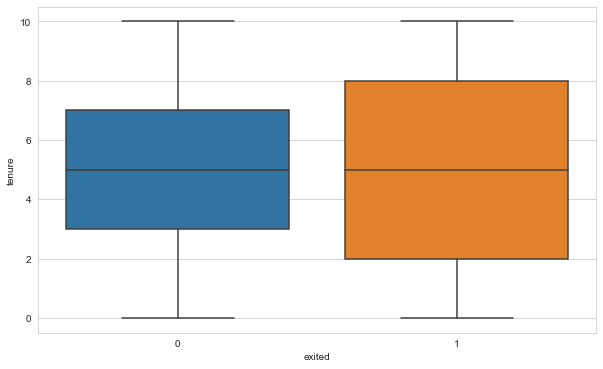

In [123]:
sns.boxplot(x = df.exited, y =df.tenure)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   creditscore      10000 non-null  int64  
 1   geography        10000 non-null  object 
 2   gender           10000 non-null  int64  
 3   age              10000 non-null  int64  
 4   tenure           10000 non-null  int64  
 5   balance          10000 non-null  float64
 6   numofproducts    10000 non-null  int64  
 7   hascrcard        10000 non-null  int64  
 8   isactivemember   10000 non-null  int64  
 9   estimatedsalary  10000 non-null  float64
 10  exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 859.5+ KB


### Balance

In [125]:
df.balance.value_counts()

0.000         3617
130170.820       2
105473.740       2
85304.270        1
159397.750       1
              ... 
81556.890        1
112687.690       1
108698.960       1
238387.560       1
130142.790       1
Name: balance, Length: 6382, dtype: int64

In [126]:
df.balance.nunique()

6382

<AxesSubplot:xlabel='balance', ylabel='Count'>

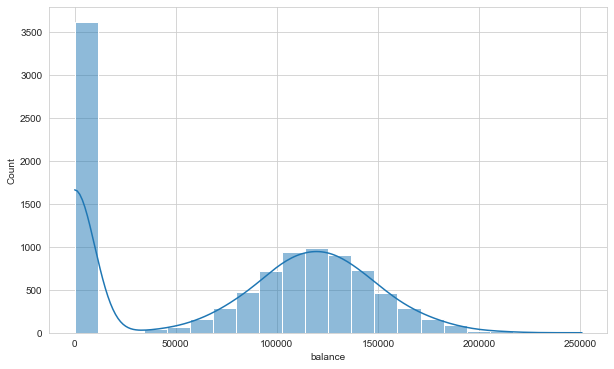

In [127]:
sns.histplot(df.balance, kde = True)

### Numofproducts

In [128]:
df.numofproducts.value_counts()

1    5084
2    4590
3     266
4      60
Name: numofproducts, dtype: int64

<AxesSubplot:xlabel='numofproducts', ylabel='count'>

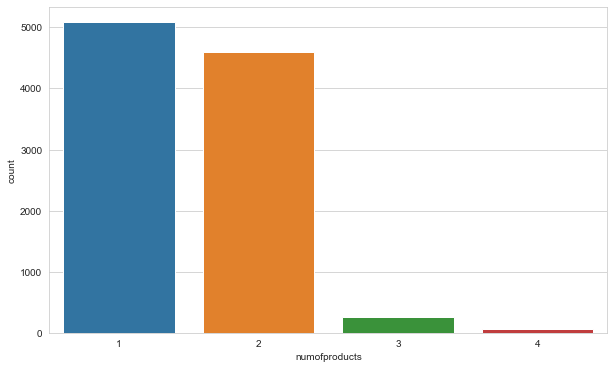

In [129]:
sns.countplot(df.numofproducts)

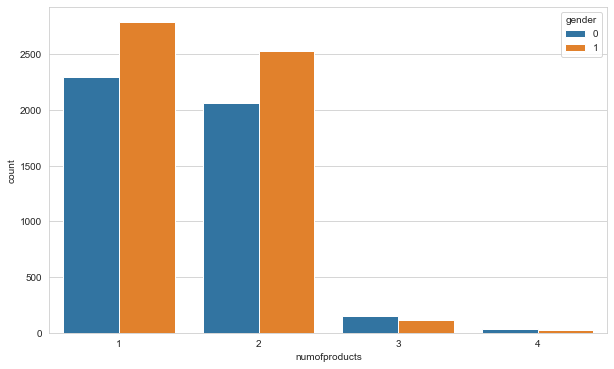

In [130]:
sns.countplot(df.numofproducts, hue = df.gender);

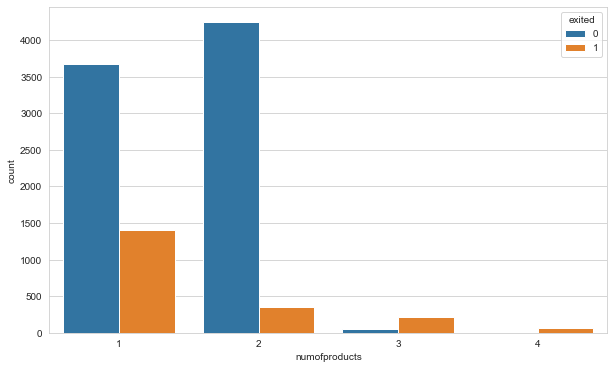

In [131]:
sns.countplot(df.numofproducts, hue = df.exited);

### Hascrcard

In [132]:
df.hascrcard.value_counts()

1    7055
0    2945
Name: hascrcard, dtype: int64

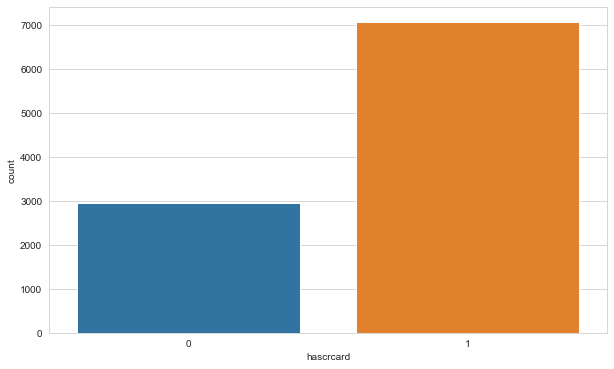

In [133]:
sns.countplot(df.hascrcard);

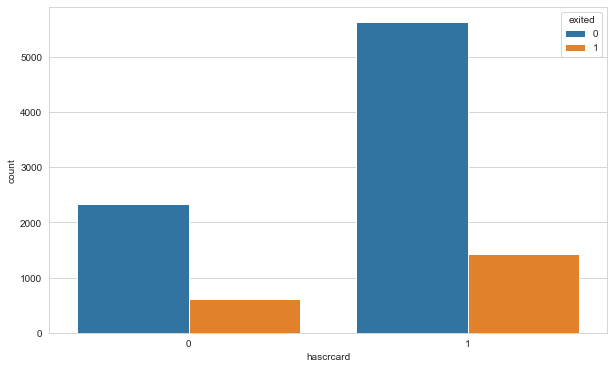

In [134]:
sns.countplot(df.hascrcard, hue = df.exited);

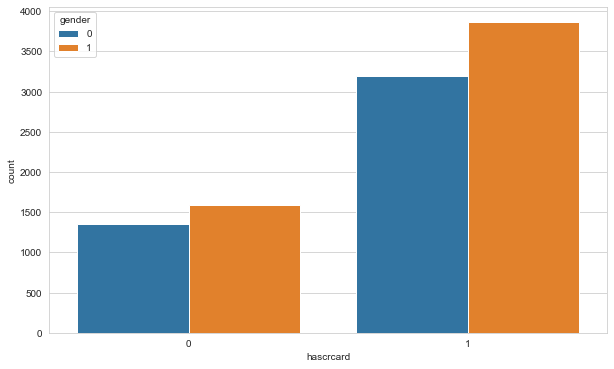

In [135]:
sns.countplot(df.hascrcard, hue = df.gender);

### Is active member

In [136]:
df.isactivemember.value_counts()

1    5151
0    4849
Name: isactivemember, dtype: int64

<AxesSubplot:xlabel='isactivemember', ylabel='count'>

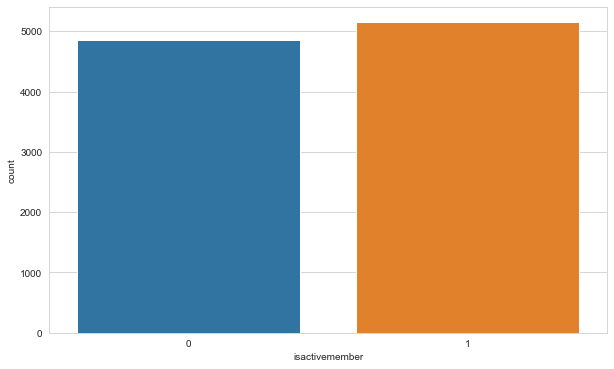

In [137]:
sns.countplot(df.isactivemember)

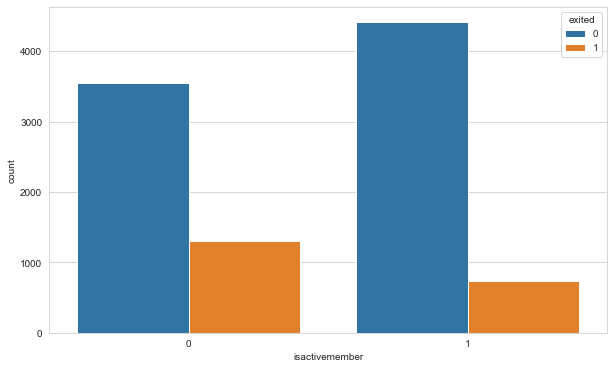

In [138]:
sns.countplot(df.isactivemember, hue = df.exited);

### Estimatedsalary  

In [139]:
df.estimatedsalary.value_counts()

24924.920     2
101348.880    1
55313.440     1
72500.680     1
182692.800    1
             ..
120893.070    1
188377.210    1
55902.930     1
4523.740      1
38190.780     1
Name: estimatedsalary, Length: 9999, dtype: int64

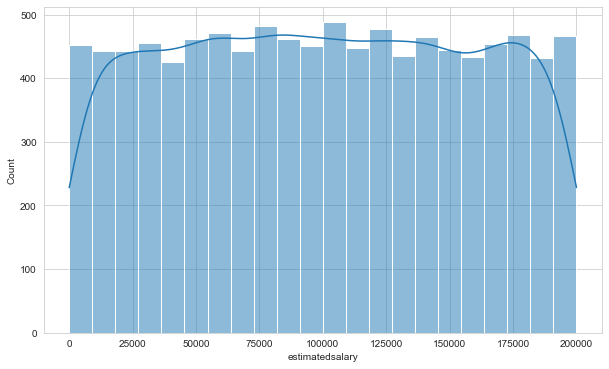

In [140]:
sns.histplot(df.estimatedsalary, kde =True);

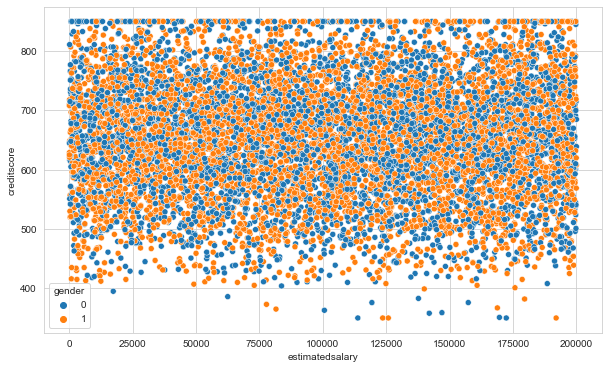

In [141]:
sns.scatterplot(x = df.estimatedsalary, y =df.creditscore, hue =  df. gender);

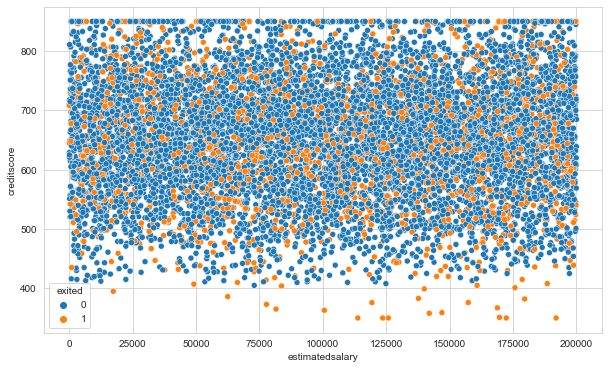

In [142]:
sns.scatterplot(x = df.estimatedsalary, y =df.creditscore, hue =  df. exited);

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   creditscore      10000 non-null  int64  
 1   geography        10000 non-null  object 
 2   gender           10000 non-null  int64  
 3   age              10000 non-null  int64  
 4   tenure           10000 non-null  int64  
 5   balance          10000 non-null  float64
 6   numofproducts    10000 non-null  int64  
 7   hascrcard        10000 non-null  int64  
 8   isactivemember   10000 non-null  int64  
 9   estimatedsalary  10000 non-null  float64
 10  exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 859.5+ KB


### Exited

In [144]:
df.exited.value_counts()

0    7963
1    2037
Name: exited, dtype: int64

<AxesSubplot:xlabel='exited', ylabel='count'>

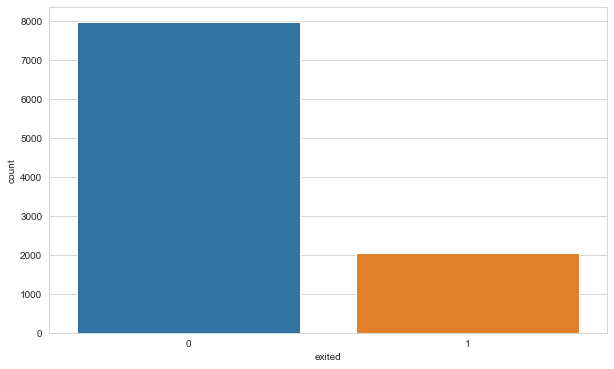

In [145]:
sns.countplot(df.exited)

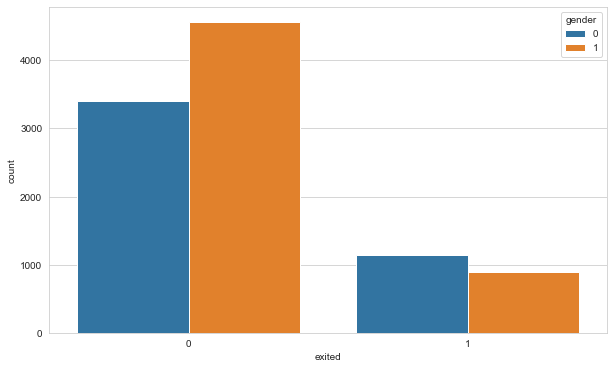

In [146]:
sns.countplot(df.exited, hue = df.gender);

In [147]:
# We replace object value with int in geography feature for model transaction (Convert categorical variables to dummy variables)

In [148]:
df = pd.get_dummies(df, prefix=['geo'],columns=['geography'])

In [149]:
df.head()

,creditscore,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geo_France,geo_Germany,geo_Spain
0,619,0,42,2,0.000,1,1,1,101348.880,1,1,0,0
1,608,0,41,1,83807.860,1,0,1,112542.580,0,0,0,1
2,502,0,42,8,159660.800,3,1,0,113931.570,1,1,0,0
3,699,0,39,1,0.000,2,0,0,93826.630,0,1,0,0
4,850,0,43,2,125510.820,1,1,1,79084.100,0,0,0,1


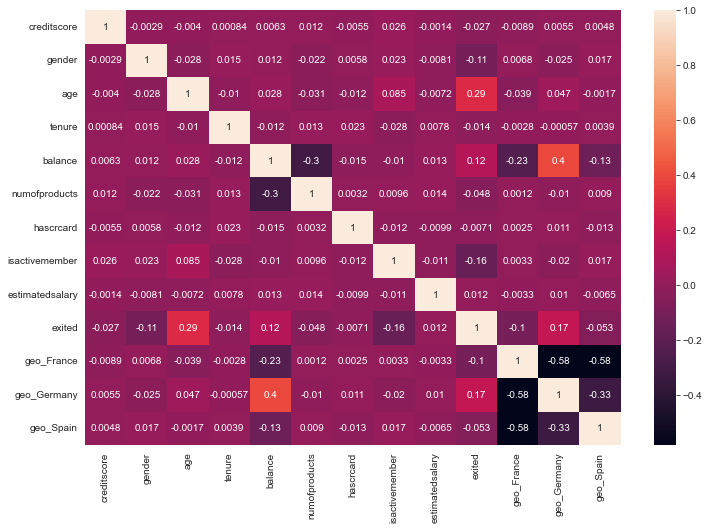

In [150]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True);

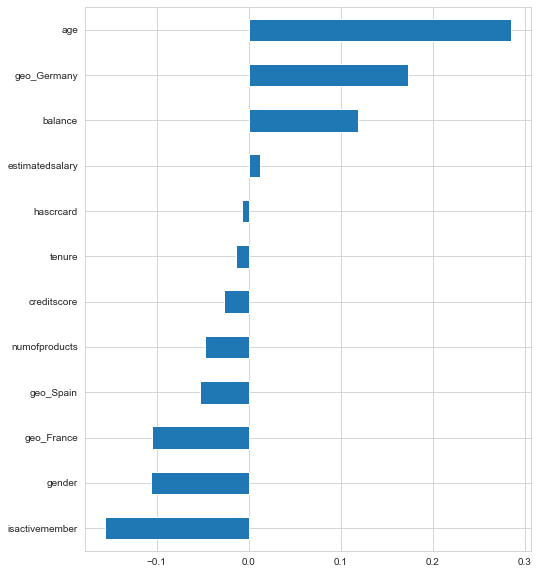

In [151]:
plt.figure(figsize = (8,10))
df.corr()['exited'].sort_values().drop("exited").plot(kind = "barh");

In [152]:
df.shape

(10000, 13)

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   creditscore      10000 non-null  int64  
 1   gender           10000 non-null  int64  
 2   age              10000 non-null  int64  
 3   tenure           10000 non-null  int64  
 4   balance          10000 non-null  float64
 5   numofproducts    10000 non-null  int64  
 6   hascrcard        10000 non-null  int64  
 7   isactivemember   10000 non-null  int64  
 8   estimatedsalary  10000 non-null  float64
 9   exited           10000 non-null  int64  
 10  geo_France       10000 non-null  uint8  
 11  geo_Germany      10000 non-null  uint8  
 12  geo_Spain        10000 non-null  uint8  
dtypes: float64(2), int64(8), uint8(3)
memory usage: 810.7 KB


# Preprocessing of Data
- Train | Test Split, Scalling

In [190]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [191]:
X = df.drop('exited', axis=1)
y = df['exited']

In [192]:
seed = 42

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.20, random_state = seed)

In [194]:
scaler = MinMaxScaler()

In [195]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [209]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [210]:
X_train.shape

(8000, 12)

In [211]:
X_test.shape

(2000, 12)

In [199]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(18, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])

In [200]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 64, epochs = 300, verbose=1)

Epoch 1/300
113/113 [==============================] - 1s 5ms/step - loss: 0.5294 - recall: 6.7659e-04 - val_loss: 0.4811 - val_recall: 0.0000e+00
Epoch 2/300
113/113 [==============================] - 0s 3ms/step - loss: 0.4857 - recall: 0.0047 - val_loss: 0.4638 - val_recall: 0.0197
Epoch 3/300
113/113 [==============================] - 0s 3ms/step - loss: 0.4717 - recall: 0.0426 - val_loss: 0.4555 - val_recall: 0.0526
Epoch 4/300
113/113 [==============================] - 0s 3ms/step - loss: 0.4627 - recall: 0.1110 - val_loss: 0.4496 - val_recall: 0.0658
Epoch 5/300
113/113 [==============================] - 0s 3ms/step - loss: 0.4554 - recall: 0.1137 - val_loss: 0.4419 - val_recall: 0.0855
Epoch 6/300
113/113 [==============================] - 0s 3ms/step - loss: 0.4472 - recall: 0.1116 - val_loss: 0.4346 - val_recall: 0.1316
Epoch 7/300
113/113 [==============================] - 0s 3ms/step - loss: 0.4391 - recall: 0.1536 - val_loss: 0.4257 - val_recall: 0.1382
Epoch 8/300
113/113

113/113 [==============================] - 0s 3ms/step - loss: 0.3387 - recall: 0.4756 - val_loss: 0.3174 - val_recall: 0.5461
Epoch 60/300
113/113 [==============================] - 0s 2ms/step - loss: 0.3379 - recall: 0.4831 - val_loss: 0.3121 - val_recall: 0.5197
Epoch 61/300
113/113 [==============================] - 0s 3ms/step - loss: 0.3384 - recall: 0.4797 - val_loss: 0.3110 - val_recall: 0.4803
Epoch 62/300
113/113 [==============================] - 0s 2ms/step - loss: 0.3377 - recall: 0.4844 - val_loss: 0.3095 - val_recall: 0.4276
Epoch 63/300
113/113 [==============================] - 0s 3ms/step - loss: 0.3368 - recall: 0.4811 - val_loss: 0.3134 - val_recall: 0.5329
Epoch 64/300
113/113 [==============================] - 0s 3ms/step - loss: 0.3392 - recall: 0.4844 - val_loss: 0.3105 - val_recall: 0.4934
Epoch 65/300
113/113 [==============================] - 0s 3ms/step - loss: 0.3373 - recall: 0.4817 - val_loss: 0.3102 - val_recall: 0.4934
Epoch 66/300
113/113 [===========

113/113 [==============================] - 0s 3ms/step - loss: 0.3331 - recall: 0.4973 - val_loss: 0.3085 - val_recall: 0.5000
Epoch 118/300
113/113 [==============================] - 0s 3ms/step - loss: 0.3331 - recall: 0.4885 - val_loss: 0.3095 - val_recall: 0.4934
Epoch 119/300
113/113 [==============================] - 0s 3ms/step - loss: 0.3334 - recall: 0.4946 - val_loss: 0.3100 - val_recall: 0.5263
Epoch 120/300
113/113 [==============================] - 0s 3ms/step - loss: 0.3338 - recall: 0.5020 - val_loss: 0.3087 - val_recall: 0.4868
Epoch 121/300
113/113 [==============================] - 0s 3ms/step - loss: 0.3348 - recall: 0.4980 - val_loss: 0.3080 - val_recall: 0.4934
Epoch 122/300
113/113 [==============================] - 0s 3ms/step - loss: 0.3331 - recall: 0.4959 - val_loss: 0.3095 - val_recall: 0.4539
Epoch 123/300
113/113 [==============================] - 0s 3ms/step - loss: 0.3327 - recall: 0.4926 - val_loss: 0.3096 - val_recall: 0.5197
Epoch 124/300
113/113 [====

113/113 [==============================] - 0s 3ms/step - loss: 0.3302 - recall: 0.4926 - val_loss: 0.3086 - val_recall: 0.4605
Epoch 176/300
113/113 [==============================] - 0s 2ms/step - loss: 0.3302 - recall: 0.5014 - val_loss: 0.3079 - val_recall: 0.4934
Epoch 177/300
113/113 [==============================] - 0s 3ms/step - loss: 0.3309 - recall: 0.5095 - val_loss: 0.3094 - val_recall: 0.5066
Epoch 178/300
113/113 [==============================] - 0s 3ms/step - loss: 0.3300 - recall: 0.5034 - val_loss: 0.3099 - val_recall: 0.5000
Epoch 179/300
113/113 [==============================] - 0s 2ms/step - loss: 0.3304 - recall: 0.5027 - val_loss: 0.3091 - val_recall: 0.5132
Epoch 180/300
113/113 [==============================] - 0s 2ms/step - loss: 0.3303 - recall: 0.5047 - val_loss: 0.3107 - val_recall: 0.4145
Epoch 181/300
113/113 [==============================] - 0s 2ms/step - loss: 0.3305 - recall: 0.4926 - val_loss: 0.3138 - val_recall: 0.5658
Epoch 182/300
113/113 [====

113/113 [==============================] - 0s 3ms/step - loss: 0.3282 - recall: 0.5027 - val_loss: 0.3117 - val_recall: 0.5066
Epoch 234/300
113/113 [==============================] - 0s 3ms/step - loss: 0.3287 - recall: 0.5074 - val_loss: 0.3109 - val_recall: 0.4803
Epoch 235/300
113/113 [==============================] - 0s 3ms/step - loss: 0.3282 - recall: 0.4986 - val_loss: 0.3153 - val_recall: 0.5000
Epoch 236/300
113/113 [==============================] - 0s 3ms/step - loss: 0.3280 - recall: 0.5027 - val_loss: 0.3142 - val_recall: 0.5000
Epoch 237/300
113/113 [==============================] - 0s 3ms/step - loss: 0.3282 - recall: 0.5101 - val_loss: 0.3130 - val_recall: 0.4408
Epoch 238/300
113/113 [==============================] - 0s 3ms/step - loss: 0.3287 - recall: 0.4980 - val_loss: 0.3147 - val_recall: 0.5066
Epoch 239/300
113/113 [==============================] - 0s 3ms/step - loss: 0.3279 - recall: 0.5027 - val_loss: 0.3158 - val_recall: 0.5197
Epoch 240/300
113/113 [====

113/113 [==============================] - 0s 2ms/step - loss: 0.3266 - recall: 0.5142 - val_loss: 0.3130 - val_recall: 0.4605
Epoch 292/300
113/113 [==============================] - 0s 2ms/step - loss: 0.3282 - recall: 0.5095 - val_loss: 0.3145 - val_recall: 0.3947
Epoch 293/300
113/113 [==============================] - 0s 2ms/step - loss: 0.3272 - recall: 0.5047 - val_loss: 0.3134 - val_recall: 0.4803
Epoch 294/300
113/113 [==============================] - 0s 3ms/step - loss: 0.3268 - recall: 0.5054 - val_loss: 0.3171 - val_recall: 0.4934
Epoch 295/300
113/113 [==============================] - 0s 2ms/step - loss: 0.3265 - recall: 0.5054 - val_loss: 0.3165 - val_recall: 0.5066
Epoch 296/300
113/113 [==============================] - 0s 2ms/step - loss: 0.3269 - recall: 0.5122 - val_loss: 0.3138 - val_recall: 0.4342
Epoch 297/300
113/113 [==============================] - 0s 2ms/step - loss: 0.3266 - recall: 0.5129 - val_loss: 0.3154 - val_recall: 0.4605
Epoch 298/300
113/113 [====

In [201]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 18)                234       
                                                                 
 dense_25 (Dense)            (None, 9)                 171       
                                                                 
 dense_26 (Dense)            (None, 1)                 10        
                                                                 
Total params: 415
Trainable params: 415
Non-trainable params: 0
_________________________________________________________________


In [202]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.529,0.001,0.481,0.000
1,0.486,0.005,0.464,0.020
2,0.472,0.043,0.455,0.053
3,0.463,0.111,0.450,0.066
4,0.455,0.114,0.442,0.086


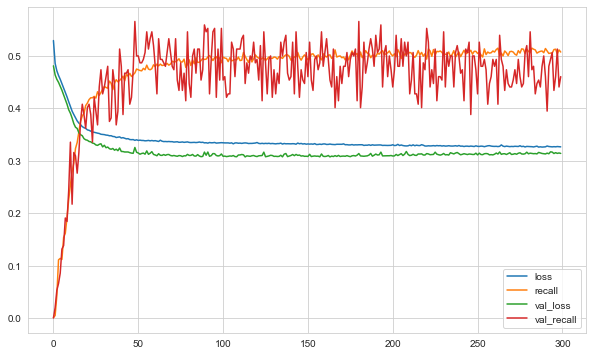

In [203]:
loss_df.plot();

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [206]:
model.evaluate(X_test, y_test, verbose=0)

[0.3410976529121399, 0.47174447774887085]

In [207]:
loss, Recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("Recall : ", Recall)

loss :  0.3410976529121399
Recall :  0.47174447774887085


In [208]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
[[1530   63]
 [ 215  192]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.75      0.47      0.58       407

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [215]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(18, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])

In [216]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6279434850863422, 1: 2.4539877300613497}

In [217]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 64, epochs = 300, verbose = 1,
          class_weight=class_weights)

Epoch 1/300
113/113 [==============================] - 2s 7ms/step - loss: 0.6762 - recall: 0.4966 - val_loss: 0.6626 - val_recall: 0.6908
Epoch 2/300
113/113 [==============================] - 0s 3ms/step - loss: 0.6381 - recall: 0.6340 - val_loss: 0.6433 - val_recall: 0.6776
Epoch 3/300
113/113 [==============================] - 0s 4ms/step - loss: 0.6214 - recall: 0.6685 - val_loss: 0.6000 - val_recall: 0.6316
Epoch 4/300
113/113 [==============================] - 0s 4ms/step - loss: 0.6080 - recall: 0.6773 - val_loss: 0.5645 - val_recall: 0.6053
Epoch 5/300
113/113 [==============================] - 0s 3ms/step - loss: 0.5982 - recall: 0.6847 - val_loss: 0.5618 - val_recall: 0.6250
Epoch 6/300
113/113 [==============================] - 0s 3ms/step - loss: 0.5886 - recall: 0.6881 - val_loss: 0.5840 - val_recall: 0.7039
Epoch 7/300
113/113 [==============================] - 0s 3ms/step - loss: 0.5812 - recall: 0.7097 - val_loss: 0.5533 - val_recall: 0.6711
Epoch 8/300
113/113 [======

113/113 [==============================] - 0s 3ms/step - loss: 0.4641 - recall: 0.7754 - val_loss: 0.4711 - val_recall: 0.8289
Epoch 60/300
113/113 [==============================] - 0s 3ms/step - loss: 0.4614 - recall: 0.7720 - val_loss: 0.4646 - val_recall: 0.8355
Epoch 61/300
113/113 [==============================] - 0s 3ms/step - loss: 0.4615 - recall: 0.7754 - val_loss: 0.4453 - val_recall: 0.8158
Epoch 62/300
113/113 [==============================] - 0s 3ms/step - loss: 0.4615 - recall: 0.7781 - val_loss: 0.4258 - val_recall: 0.7895
Epoch 63/300
113/113 [==============================] - 0s 3ms/step - loss: 0.4601 - recall: 0.7720 - val_loss: 0.4663 - val_recall: 0.8289
Epoch 64/300
113/113 [==============================] - 0s 3ms/step - loss: 0.4623 - recall: 0.7801 - val_loss: 0.4566 - val_recall: 0.8289
Epoch 65/300
113/113 [==============================] - 0s 3ms/step - loss: 0.4601 - recall: 0.7760 - val_loss: 0.4389 - val_recall: 0.7895
Epoch 66/300
113/113 [===========

113/113 [==============================] - 0s 3ms/step - loss: 0.4439 - recall: 0.7794 - val_loss: 0.4406 - val_recall: 0.8026
Epoch 118/300
113/113 [==============================] - 0s 3ms/step - loss: 0.4446 - recall: 0.7794 - val_loss: 0.4164 - val_recall: 0.7829
Epoch 119/300
113/113 [==============================] - 0s 3ms/step - loss: 0.4437 - recall: 0.7821 - val_loss: 0.4356 - val_recall: 0.8092
Epoch 120/300
113/113 [==============================] - 0s 3ms/step - loss: 0.4449 - recall: 0.7848 - val_loss: 0.4218 - val_recall: 0.7895
Epoch 121/300
113/113 [==============================] - 0s 3ms/step - loss: 0.4456 - recall: 0.7848 - val_loss: 0.4274 - val_recall: 0.7895
Epoch 122/300
113/113 [==============================] - 0s 3ms/step - loss: 0.4432 - recall: 0.7801 - val_loss: 0.4017 - val_recall: 0.7763
Epoch 123/300
113/113 [==============================] - 0s 3ms/step - loss: 0.4431 - recall: 0.7788 - val_loss: 0.4475 - val_recall: 0.8026
Epoch 124/300
113/113 [====

113/113 [==============================] - 0s 3ms/step - loss: 0.4344 - recall: 0.7882 - val_loss: 0.4091 - val_recall: 0.7566
Epoch 176/300
113/113 [==============================] - 0s 3ms/step - loss: 0.4343 - recall: 0.7862 - val_loss: 0.4389 - val_recall: 0.8026
Epoch 177/300
113/113 [==============================] - 0s 3ms/step - loss: 0.4348 - recall: 0.7835 - val_loss: 0.4244 - val_recall: 0.7829
Epoch 178/300
113/113 [==============================] - 0s 3ms/step - loss: 0.4341 - recall: 0.7815 - val_loss: 0.4511 - val_recall: 0.8092
Epoch 179/300
113/113 [==============================] - 0s 3ms/step - loss: 0.4344 - recall: 0.7869 - val_loss: 0.4508 - val_recall: 0.8158
Epoch 180/300
113/113 [==============================] - 0s 3ms/step - loss: 0.4355 - recall: 0.7903 - val_loss: 0.4168 - val_recall: 0.7697
Epoch 181/300
113/113 [==============================] - 0s 3ms/step - loss: 0.4340 - recall: 0.7896 - val_loss: 0.4620 - val_recall: 0.8158
Epoch 182/300
113/113 [====

113/113 [==============================] - 0s 3ms/step - loss: 0.4312 - recall: 0.7896 - val_loss: 0.4312 - val_recall: 0.7961
Epoch 234/300
113/113 [==============================] - 0s 3ms/step - loss: 0.4312 - recall: 0.7936 - val_loss: 0.4241 - val_recall: 0.7961
Epoch 235/300
113/113 [==============================] - 0s 3ms/step - loss: 0.4311 - recall: 0.7876 - val_loss: 0.4763 - val_recall: 0.8158
Epoch 236/300
113/113 [==============================] - 0s 3ms/step - loss: 0.4311 - recall: 0.7923 - val_loss: 0.4670 - val_recall: 0.8158
Epoch 237/300
113/113 [==============================] - 0s 3ms/step - loss: 0.4317 - recall: 0.7889 - val_loss: 0.4039 - val_recall: 0.7566
Epoch 238/300
113/113 [==============================] - 0s 3ms/step - loss: 0.4310 - recall: 0.7855 - val_loss: 0.4610 - val_recall: 0.8092
Epoch 239/300
113/113 [==============================] - 0s 3ms/step - loss: 0.4304 - recall: 0.7821 - val_loss: 0.4885 - val_recall: 0.8158
Epoch 240/300
113/113 [====

113/113 [==============================] - 0s 3ms/step - loss: 0.4281 - recall: 0.7923 - val_loss: 0.4047 - val_recall: 0.7566
Epoch 292/300
113/113 [==============================] - 0s 3ms/step - loss: 0.4309 - recall: 0.7923 - val_loss: 0.3801 - val_recall: 0.7039
Epoch 293/300
113/113 [==============================] - 0s 3ms/step - loss: 0.4293 - recall: 0.7801 - val_loss: 0.4409 - val_recall: 0.7961
Epoch 294/300
113/113 [==============================] - 0s 3ms/step - loss: 0.4282 - recall: 0.7862 - val_loss: 0.4480 - val_recall: 0.8092
Epoch 295/300
113/113 [==============================] - 0s 3ms/step - loss: 0.4275 - recall: 0.7957 - val_loss: 0.4647 - val_recall: 0.8026
Epoch 296/300
113/113 [==============================] - 0s 3ms/step - loss: 0.4297 - recall: 0.7943 - val_loss: 0.4009 - val_recall: 0.7434
Epoch 297/300
113/113 [==============================] - 0s 3ms/step - loss: 0.4277 - recall: 0.7923 - val_loss: 0.4487 - val_recall: 0.7961
Epoch 298/300
113/113 [====

<AxesSubplot:>

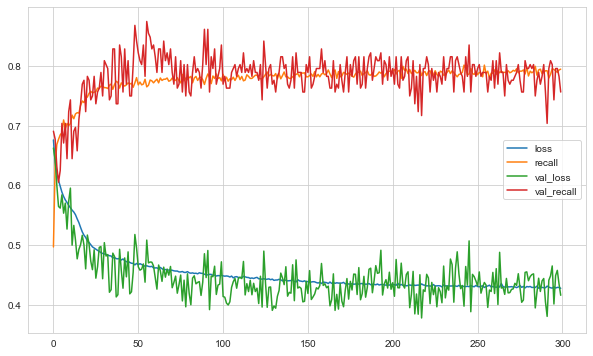

In [218]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [220]:
loss, Recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("Recall : ", Recall)

loss :  0.435862272977829
Recall :  0.751842737197876


In [221]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
[[1284  309]
 [ 101  306]]
              precision    recall  f1-score   support

           0       0.93      0.81      0.86      1593
           1       0.50      0.75      0.60       407

    accuracy                           0.80      2000
   macro avg       0.71      0.78      0.73      2000
weighted avg       0.84      0.80      0.81      2000



63/63 [==============================] - 0s 2ms/step


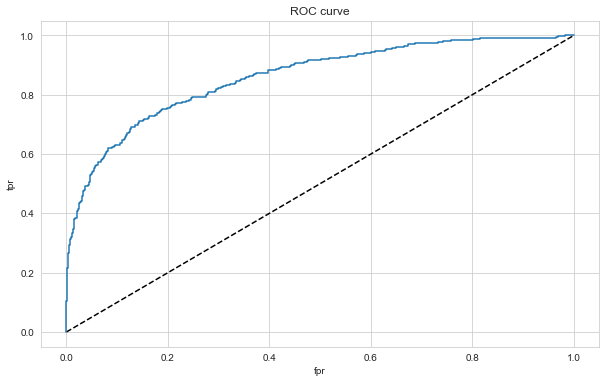

In [222]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [223]:
roc_auc_score(y_test, y_pred_proba)

0.8598105038783004

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [224]:
from tensorflow.keras.optimizers import Adam

In [225]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(learning_rate = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [226]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 64, epochs = 300, verbose = 1, class_weight=class_weights)

Epoch 1/300
113/113 [==============================] - 2s 5ms/step - loss: 0.6393 - recall: 0.5893 - val_loss: 0.5219 - val_recall: 0.5658
Epoch 2/300
113/113 [==============================] - 0s 3ms/step - loss: 0.5780 - recall: 0.6746 - val_loss: 0.5713 - val_recall: 0.7632
Epoch 3/300
113/113 [==============================] - 0s 3ms/step - loss: 0.5250 - recall: 0.7307 - val_loss: 0.4317 - val_recall: 0.6447
Epoch 4/300
113/113 [==============================] - 0s 3ms/step - loss: 0.4987 - recall: 0.7442 - val_loss: 0.4015 - val_recall: 0.5658
Epoch 5/300
113/113 [==============================] - 0s 3ms/step - loss: 0.4928 - recall: 0.7395 - val_loss: 0.5452 - val_recall: 0.7566
Epoch 6/300
113/113 [==============================] - 0s 3ms/step - loss: 0.4901 - recall: 0.7490 - val_loss: 0.4229 - val_recall: 0.7105
Epoch 7/300
113/113 [==============================] - 0s 3ms/step - loss: 0.4810 - recall: 0.7382 - val_loss: 0.4106 - val_recall: 0.7039
Epoch 8/300
113/113 [======

113/113 [==============================] - 0s 3ms/step - loss: 0.4117 - recall: 0.8119 - val_loss: 0.5076 - val_recall: 0.7632
Epoch 60/300
113/113 [==============================] - 0s 3ms/step - loss: 0.4013 - recall: 0.8119 - val_loss: 0.4381 - val_recall: 0.7566
Epoch 61/300
113/113 [==============================] - 0s 3ms/step - loss: 0.4080 - recall: 0.8139 - val_loss: 0.4419 - val_recall: 0.7961
Epoch 62/300
113/113 [==============================] - 0s 3ms/step - loss: 0.4034 - recall: 0.8194 - val_loss: 0.4346 - val_recall: 0.7895
Epoch 63/300
113/113 [==============================] - 0s 3ms/step - loss: 0.4018 - recall: 0.8139 - val_loss: 0.4564 - val_recall: 0.7566
Epoch 64/300
113/113 [==============================] - 0s 3ms/step - loss: 0.4011 - recall: 0.8227 - val_loss: 0.4022 - val_recall: 0.7171
Epoch 65/300
113/113 [==============================] - 0s 3ms/step - loss: 0.3984 - recall: 0.8133 - val_loss: 0.4169 - val_recall: 0.7434
Epoch 66/300
113/113 [===========

113/113 [==============================] - 0s 3ms/step - loss: 0.3517 - recall: 0.8498 - val_loss: 0.4162 - val_recall: 0.7171
Epoch 118/300
113/113 [==============================] - 0s 3ms/step - loss: 0.3523 - recall: 0.8457 - val_loss: 0.4469 - val_recall: 0.7500
Epoch 119/300
113/113 [==============================] - 0s 3ms/step - loss: 0.3495 - recall: 0.8464 - val_loss: 0.4224 - val_recall: 0.7105
Epoch 120/300
113/113 [==============================] - 0s 3ms/step - loss: 0.3531 - recall: 0.8451 - val_loss: 0.4347 - val_recall: 0.7368
Epoch 121/300
113/113 [==============================] - 0s 3ms/step - loss: 0.3565 - recall: 0.8268 - val_loss: 0.4620 - val_recall: 0.7632
Epoch 122/300
113/113 [==============================] - 0s 3ms/step - loss: 0.3550 - recall: 0.8437 - val_loss: 0.4156 - val_recall: 0.6842
Epoch 123/300
113/113 [==============================] - 0s 3ms/step - loss: 0.3470 - recall: 0.8457 - val_loss: 0.4616 - val_recall: 0.7500
Epoch 124/300
113/113 [====

113/113 [==============================] - 0s 3ms/step - loss: 0.3128 - recall: 0.8687 - val_loss: 0.4736 - val_recall: 0.7368
Epoch 176/300
113/113 [==============================] - 0s 3ms/step - loss: 0.3227 - recall: 0.8586 - val_loss: 0.5092 - val_recall: 0.7566
Epoch 177/300
113/113 [==============================] - 0s 3ms/step - loss: 0.3228 - recall: 0.8620 - val_loss: 0.4832 - val_recall: 0.7368
Epoch 178/300
113/113 [==============================] - 0s 3ms/step - loss: 0.3129 - recall: 0.8721 - val_loss: 0.5039 - val_recall: 0.6842
Epoch 179/300
113/113 [==============================] - 0s 3ms/step - loss: 0.3120 - recall: 0.8701 - val_loss: 0.4718 - val_recall: 0.6711
Epoch 180/300
113/113 [==============================] - 0s 3ms/step - loss: 0.3105 - recall: 0.8748 - val_loss: 0.4408 - val_recall: 0.6645
Epoch 181/300
113/113 [==============================] - 0s 3ms/step - loss: 0.3115 - recall: 0.8728 - val_loss: 0.5478 - val_recall: 0.7368
Epoch 182/300
113/113 [====

113/113 [==============================] - 0s 3ms/step - loss: 0.2900 - recall: 0.8829 - val_loss: 0.5676 - val_recall: 0.7500
Epoch 234/300
113/113 [==============================] - 0s 3ms/step - loss: 0.3108 - recall: 0.8809 - val_loss: 0.5074 - val_recall: 0.7237
Epoch 235/300
113/113 [==============================] - 0s 3ms/step - loss: 0.3005 - recall: 0.8823 - val_loss: 0.5302 - val_recall: 0.6908
Epoch 236/300
113/113 [==============================] - 0s 3ms/step - loss: 0.2982 - recall: 0.8762 - val_loss: 0.5594 - val_recall: 0.6974
Epoch 237/300
113/113 [==============================] - 0s 3ms/step - loss: 0.2926 - recall: 0.8802 - val_loss: 0.5014 - val_recall: 0.6382
Epoch 238/300
113/113 [==============================] - 0s 3ms/step - loss: 0.2937 - recall: 0.8782 - val_loss: 0.5649 - val_recall: 0.7171
Epoch 239/300
113/113 [==============================] - 0s 3ms/step - loss: 0.2916 - recall: 0.8850 - val_loss: 0.5189 - val_recall: 0.6711
Epoch 240/300
113/113 [====

113/113 [==============================] - 0s 3ms/step - loss: 0.2830 - recall: 0.8951 - val_loss: 0.5325 - val_recall: 0.6382
Epoch 292/300
113/113 [==============================] - 0s 3ms/step - loss: 0.2873 - recall: 0.8863 - val_loss: 0.5240 - val_recall: 0.6053
Epoch 293/300
113/113 [==============================] - 0s 3ms/step - loss: 0.2946 - recall: 0.8809 - val_loss: 0.5630 - val_recall: 0.7039
Epoch 294/300
113/113 [==============================] - 0s 3ms/step - loss: 0.2805 - recall: 0.8972 - val_loss: 0.5729 - val_recall: 0.6645
Epoch 295/300
113/113 [==============================] - 0s 3ms/step - loss: 0.2948 - recall: 0.8802 - val_loss: 0.6160 - val_recall: 0.7171
Epoch 296/300
113/113 [==============================] - 0s 3ms/step - loss: 0.2777 - recall: 0.8938 - val_loss: 0.5768 - val_recall: 0.7039
Epoch 297/300
113/113 [==============================] - 0s 3ms/step - loss: 0.2928 - recall: 0.8857 - val_loss: 0.5512 - val_recall: 0.7039
Epoch 298/300
113/113 [====

<AxesSubplot:>

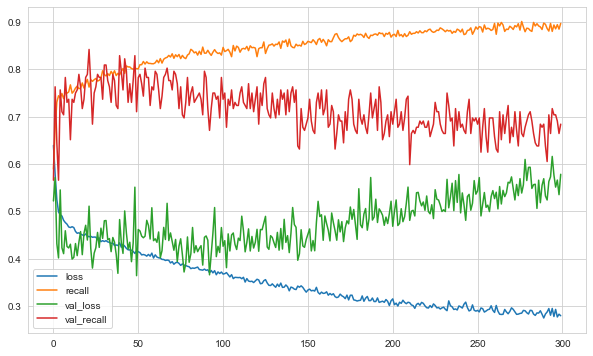

In [227]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [228]:
loss, Recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("Recall : ", Recall)

loss :  0.7309051752090454
Recall :  0.6781326532363892


In [230]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
[[1231  362]
 [ 131  276]]
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1593
           1       0.43      0.68      0.53       407

    accuracy                           0.75      2000
   macro avg       0.67      0.73      0.68      2000
weighted avg       0.81      0.75      0.77      2000



### Add Dropout Layer

In [231]:
from tensorflow.keras.layers import Dropout

In [232]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(18, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(9, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(learning_rate = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [233]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 64, epochs = 300, verbose = 1, class_weight=class_weights)

Epoch 1/300
113/113 [==============================] - 2s 5ms/step - loss: 0.7061 - recall: 0.5250 - val_loss: 0.6840 - val_recall: 0.4145
Epoch 2/300
113/113 [==============================] - 0s 3ms/step - loss: 0.6867 - recall: 0.5562 - val_loss: 0.6879 - val_recall: 0.6776
Epoch 3/300
113/113 [==============================] - 0s 3ms/step - loss: 0.6868 - recall: 0.5507 - val_loss: 0.6732 - val_recall: 0.4211
Epoch 4/300
113/113 [==============================] - 0s 3ms/step - loss: 0.6746 - recall: 0.4912 - val_loss: 0.6706 - val_recall: 0.5395
Epoch 5/300
113/113 [==============================] - 0s 3ms/step - loss: 0.6717 - recall: 0.4716 - val_loss: 0.6462 - val_recall: 0.4671
Epoch 6/300
113/113 [==============================] - 0s 3ms/step - loss: 0.6707 - recall: 0.4919 - val_loss: 0.6374 - val_recall: 0.5000
Epoch 7/300
113/113 [==============================] - 0s 4ms/step - loss: 0.6601 - recall: 0.4824 - val_loss: 0.6239 - val_recall: 0.4934
Epoch 8/300
113/113 [======

113/113 [==============================] - 0s 3ms/step - loss: 0.5375 - recall: 0.6664 - val_loss: 0.4788 - val_recall: 0.7434
Epoch 60/300
113/113 [==============================] - 0s 3ms/step - loss: 0.5428 - recall: 0.6678 - val_loss: 0.4815 - val_recall: 0.7566
Epoch 61/300
113/113 [==============================] - 0s 3ms/step - loss: 0.5333 - recall: 0.6854 - val_loss: 0.4947 - val_recall: 0.7566
Epoch 62/300
113/113 [==============================] - 0s 3ms/step - loss: 0.5407 - recall: 0.6617 - val_loss: 0.4804 - val_recall: 0.7697
Epoch 63/300
113/113 [==============================] - 0s 3ms/step - loss: 0.5406 - recall: 0.6658 - val_loss: 0.4859 - val_recall: 0.7829
Epoch 64/300
113/113 [==============================] - 0s 3ms/step - loss: 0.5395 - recall: 0.6712 - val_loss: 0.4817 - val_recall: 0.7500
Epoch 65/300
113/113 [==============================] - 0s 3ms/step - loss: 0.5416 - recall: 0.6637 - val_loss: 0.4772 - val_recall: 0.7632
Epoch 66/300
113/113 [===========

113/113 [==============================] - 0s 3ms/step - loss: 0.5269 - recall: 0.7030 - val_loss: 0.4620 - val_recall: 0.7566
Epoch 118/300
113/113 [==============================] - 0s 3ms/step - loss: 0.5295 - recall: 0.6732 - val_loss: 0.4685 - val_recall: 0.7303
Epoch 119/300
113/113 [==============================] - 0s 3ms/step - loss: 0.5300 - recall: 0.6962 - val_loss: 0.4862 - val_recall: 0.7763
Epoch 120/300
113/113 [==============================] - 0s 3ms/step - loss: 0.5336 - recall: 0.6894 - val_loss: 0.4638 - val_recall: 0.7500
Epoch 121/300
113/113 [==============================] - 0s 3ms/step - loss: 0.5144 - recall: 0.6989 - val_loss: 0.4648 - val_recall: 0.7697
Epoch 122/300
113/113 [==============================] - 0s 3ms/step - loss: 0.5286 - recall: 0.6901 - val_loss: 0.4591 - val_recall: 0.7434
Epoch 123/300
113/113 [==============================] - 0s 3ms/step - loss: 0.5252 - recall: 0.6982 - val_loss: 0.4887 - val_recall: 0.7961
Epoch 124/300
113/113 [====

113/113 [==============================] - 0s 3ms/step - loss: 0.5240 - recall: 0.6955 - val_loss: 0.4537 - val_recall: 0.7500
Epoch 176/300
113/113 [==============================] - 0s 3ms/step - loss: 0.5209 - recall: 0.6894 - val_loss: 0.4769 - val_recall: 0.7829
Epoch 177/300
113/113 [==============================] - 0s 3ms/step - loss: 0.5271 - recall: 0.6996 - val_loss: 0.4743 - val_recall: 0.7961
Epoch 178/300
113/113 [==============================] - 0s 3ms/step - loss: 0.5269 - recall: 0.6705 - val_loss: 0.4770 - val_recall: 0.7895
Epoch 179/300
113/113 [==============================] - 0s 3ms/step - loss: 0.5224 - recall: 0.6928 - val_loss: 0.4886 - val_recall: 0.7961
Epoch 180/300
113/113 [==============================] - 0s 3ms/step - loss: 0.5248 - recall: 0.7118 - val_loss: 0.4305 - val_recall: 0.7237
Epoch 181/300
113/113 [==============================] - 0s 3ms/step - loss: 0.5252 - recall: 0.6908 - val_loss: 0.4998 - val_recall: 0.8026
Epoch 182/300
113/113 [====

113/113 [==============================] - 0s 4ms/step - loss: 0.5076 - recall: 0.7131 - val_loss: 0.4500 - val_recall: 0.7895
Epoch 234/300
113/113 [==============================] - 0s 4ms/step - loss: 0.5175 - recall: 0.7124 - val_loss: 0.4758 - val_recall: 0.7895
Epoch 235/300
113/113 [==============================] - 0s 4ms/step - loss: 0.5160 - recall: 0.7030 - val_loss: 0.4599 - val_recall: 0.7895
Epoch 236/300
113/113 [==============================] - 0s 3ms/step - loss: 0.5165 - recall: 0.7016 - val_loss: 0.4736 - val_recall: 0.7961
Epoch 237/300
113/113 [==============================] - 0s 4ms/step - loss: 0.5210 - recall: 0.7009 - val_loss: 0.4547 - val_recall: 0.7763
Epoch 238/300
113/113 [==============================] - 0s 4ms/step - loss: 0.5180 - recall: 0.7003 - val_loss: 0.4710 - val_recall: 0.7829
Epoch 239/300
113/113 [==============================] - 0s 4ms/step - loss: 0.5146 - recall: 0.7064 - val_loss: 0.4831 - val_recall: 0.8026
Epoch 240/300
113/113 [====

113/113 [==============================] - 0s 3ms/step - loss: 0.5083 - recall: 0.7199 - val_loss: 0.4594 - val_recall: 0.7895
Epoch 292/300
113/113 [==============================] - 0s 3ms/step - loss: 0.5130 - recall: 0.7199 - val_loss: 0.4593 - val_recall: 0.7961
Epoch 293/300
113/113 [==============================] - 0s 3ms/step - loss: 0.5153 - recall: 0.7172 - val_loss: 0.4422 - val_recall: 0.7434
Epoch 294/300
113/113 [==============================] - 0s 3ms/step - loss: 0.5200 - recall: 0.6888 - val_loss: 0.4630 - val_recall: 0.7961
Epoch 295/300
113/113 [==============================] - 0s 4ms/step - loss: 0.5170 - recall: 0.7152 - val_loss: 0.4585 - val_recall: 0.8224
Epoch 296/300
113/113 [==============================] - 0s 3ms/step - loss: 0.5119 - recall: 0.7124 - val_loss: 0.4634 - val_recall: 0.8092
Epoch 297/300
113/113 [==============================] - 0s 3ms/step - loss: 0.5230 - recall: 0.7124 - val_loss: 0.4662 - val_recall: 0.8158
Epoch 298/300
113/113 [====

<AxesSubplot:>

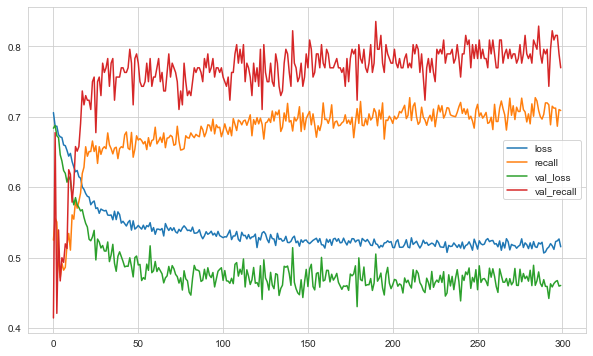

In [234]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [236]:
loss, Recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("Recall : ", Recall)

loss :  0.4713360369205475
Recall :  0.764127790927887


In [237]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
[[1236  357]
 [  96  311]]
              precision    recall  f1-score   support

           0       0.93      0.78      0.85      1593
           1       0.47      0.76      0.58       407

    accuracy                           0.77      2000
   macro avg       0.70      0.77      0.71      2000
weighted avg       0.83      0.77      0.79      2000



### Add Early Stop

In [238]:
from tensorflow.keras.callbacks import EarlyStopping

In [239]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [240]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(learning_rate = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [241]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 64, epochs = 300, verbose = 1,
          callbacks = [early_stop],class_weight=class_weights)

Epoch 1/300
113/113 [==============================] - 2s 6ms/step - loss: 0.6770 - recall: 0.3816 - val_loss: 0.6466 - val_recall: 0.7105
Epoch 2/300
113/113 [==============================] - 0s 3ms/step - loss: 0.6313 - recall: 0.6800 - val_loss: 0.6276 - val_recall: 0.7171
Epoch 3/300
113/113 [==============================] - 0s 3ms/step - loss: 0.6051 - recall: 0.6834 - val_loss: 0.5835 - val_recall: 0.6974
Epoch 4/300
113/113 [==============================] - 0s 3ms/step - loss: 0.5809 - recall: 0.7043 - val_loss: 0.5057 - val_recall: 0.5921
Epoch 5/300
113/113 [==============================] - 0s 3ms/step - loss: 0.5639 - recall: 0.7111 - val_loss: 0.5482 - val_recall: 0.7368
Epoch 6/300
113/113 [==============================] - 0s 3ms/step - loss: 0.5482 - recall: 0.7246 - val_loss: 0.5386 - val_recall: 0.7368
Epoch 7/300
113/113 [==============================] - 0s 3ms/step - loss: 0.5369 - recall: 0.7470 - val_loss: 0.4577 - val_recall: 0.6382
Epoch 8/300
113/113 [======

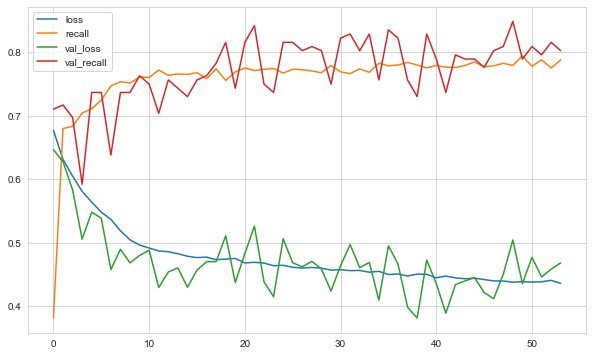

In [242]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [243]:
loss, Recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("Recall : ", Recall)

loss :  0.40203702449798584
Recall :  0.6977887153625488


In [244]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
[[1354  239]
 [ 123  284]]
              precision    recall  f1-score   support

           0       0.92      0.85      0.88      1593
           1       0.54      0.70      0.61       407

    accuracy                           0.82      2000
   macro avg       0.73      0.77      0.75      2000
weighted avg       0.84      0.82      0.83      2000



#### Monitor the "val_loss" as metric

#### Monitor the "val_recall" as metric

## GridSearchCV

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

# Final Model and Model Deployment

## Prediction

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___